# **Minería de Textos para Evaluar la Opinión Pública en Redes Sociales**
## **Elecciones Presidenciales en México 2024**

---

### **Proyecto Final de Minería de Datos**
**Autor(es):**  
Rodrigo Gerardo Trejo Arriaga  
Eidan Owen Plata Salinas  

**Contacto:**  
rtrejoa1800@alumno.ipn.mx

**Institución:**  
Instituto Politécnico Nacional — ESCOM  

**Fecha:**  
`22 de noviembre de 2024`  

---

### **Descripción**
Este cuaderno contiene el análisis exploratorio de los datos recopilados de redes sociales (YouTube y X) en el contexto de las elecciones presidenciales de México 2024. 

---

### **Conjuntos de Datos**
1. **Debates Presidenciales (YouTube)**  
   - Archivo: `comentarios_debates.csv`  
   - Registros: 9,392 comentarios  
   - Variables principales: Número de debate, canal, usuario, comentario, likes, entre otros.

2. **Día de la Elección (X)**  
   - Archivo: `horaHora_diaEleccion.csv`  
   - Registros: 2,486 publicaciones  
   - Variables principales: Usuario, handle (@), hora de publicación, texto.

---

### **Objetivo del Cuaderno**
1. Realizar un análisis exploratorio para identificar la calidad de los datos y detectar patrones iniciales.
2. Examinar distribuciones, tendencias y posibles inconsistencias en los conjuntos de datos.
3. Preparar los datos para análisis posteriores de sentimiento y tópicos clave.

---

### **Estructura del Cuaderno**
1. **Carga de Datos**
2. **Análisis Descriptivo General**
3. **Análisis de Frecuencia de Palabras**
4. **Análisis de Engagement (YouTube)**
5. **Análisis de Longitud y Complejidad de Comentarios**
6. **Conclusiones Preliminares**

---


## _Biblotecas importadas para el análisis_

In [136]:
import pandas as pd
import re
import unicodedata
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

## 1. Carga de datos y preprocesamiento del dataset

### 1.1 Carga

In [137]:
# Ruta de los archivos
ruta_youtube = 'comentarios_debates.csv'
ruta_x = 'horaHora_diaEleccion.csv'

# Cargar los datos de YouTube (Debates)
youtube_df = pd.read_csv(ruta_youtube, encoding='utf-8')
youtube_df['fecha'] = pd.to_datetime(youtube_df['fecha'], format='%d/%m/%Y', errors='coerce')
print("Conjunto de datos de YouTube cargado:")
print(youtube_df.info())

Conjunto de datos de YouTube cargado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9391 entries, 0 to 9390
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   num_debate  9391 non-null   int64         
 1   canal       9391 non-null   object        
 2   username    9391 non-null   object        
 3   fecha       9391 non-null   datetime64[ns]
 4   comentario  9380 non-null   object        
 5   num_likes   9391 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 440.3+ KB
None


In [138]:
# Leer el archivo especificando el delimitador y las comillas triples
x_df = pd.read_csv(ruta_x, encoding='utf-8', quotechar='"', skipinitialspace=True)
print("Conjunto de datos cargado correctamente:")
print(x_df.info())


Conjunto de datos cargado correctamente:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User                 2484 non-null   object
 1   arroba               2483 non-null   object
 2   hora de publicación  2484 non-null   object
 3   publicación          2484 non-null   object
dtypes: object(4)
memory usage: 77.8+ KB
None


In [139]:
youtube_df.sample(10)

num_debate      canal                    username      fecha  \
993            1        cnn          valeriamonrroy6212 2024-04-07   
8002           3       nmas                  sonotra100 2024-05-19   
1455           1       once  santoslorenzocantepena7999 2024-04-07   
4652           1      unotv                san_juan4825 2024-04-07   
9227           2   imagentv        guillermoestrada3025 2024-04-28   
7916           3       nmas        alejandromiranda8427 2024-05-19   
3341           3  excelsior             sergiojesus7853 2024-05-19   
6059           2       nmas   joseantoniolopezflores354 2024-04-28   
9035           2   imagentv       elizabethhernandez832 2024-04-28   
2789           3  excelsior             user-ui1rz9re5p 2024-05-19   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      comentario  \
993                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Pues si yo estuviera em mi mexico no votaria por nadieno ay propuestas ni soluciones claras,pierden su tiempo en estarse atacando los unos a los otros   
8002                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Los programas sociales deben permanecer Universales.   
1455                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               En las preguntas "Xóchilt". Responde si o no.   
4652                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Xochilt debe dar respuestas real

In [140]:
x_df.sample(10)

User            arroba hora de publicación  \
95          ꕥ Andrea X  ꕥ      @AndreaSegen               08:39   
598     Soldatino di Ferro     @AbramCalzada               10:22   
1074            Iñaki Levy  @ElPoderdelaInfo               15:22   
2265                 Shyru            @shyru               22:19   
387   Chimpance Del Caribe  @ChimpanceCaribe               09:06   
787        Gamaliel Ronces        @Invasionx               13:26   
1202     Jose Luis Vazquez         @luis7126               15:15   
1953                    Jj      @jjemptysoul               19:59   
1216           Eric Medher      @medheric_19               15:08   
1753      El Sol de Parral        @OEMParral               18:45   

                                                                                                                                                                                                                            publicación  
95                                                                                                                                                                "Hoy por Xóchitl, por México, por la democracia. #YoVotarePorXóchitl"  
598                                                                                                                                                          "Es un honor sacar a Obrador. #EleccionesMexico2024 #ElecciónPresidencial"  
1074  "¡LISTO! Vota Todo Morena 😏👍 Ahora sí, vamos por el Plan C, desde el PREP se verá el avasallador Triunfo de #ClaudiaPresidentaDeMéxico ¡Viva MÉXICO! 🇲🇽 Y VIVA el segundo piso de la 4ta Transformación 👏😃 #EleccionesMéxico2024"  
2265                                                                                                                                                                                                                 "YA GANO CLAUDIA?"  
387                                                                                                                                                      "Mi voto para Xóchitl!! Fuera morena!!! #EleccionesMéxico2024 #votaciones2024"  
787                                                                                                                                                                                    "#EleccionesMéxico2024 #XochitlGálvezPresidenta"  
1202                                                                                                                                           "@AtypicalTeve ya votamos que gane México #YoVotéPorXochitl @Xochitl2024 @XochitlGalvez"  
1953                                                                     "A las 8:28pm #ClaudiaSheinbaum acaba de rebasar el 60% de los votos. #XochitlGalvez pasa a 28.33%. #Maynez llega a 8.7% según el #PREP #EleccionesMéxico2024"  
1216                                                                   "Listo, ya hice mi parte @XochitlGalvez @Xochitl2024 Ahora a esperar para que usted haga la suya... No nos vaya a fallar por favor!!! #YoVotéPorXóchitl Todo 🔵⚪"  
1753                                                                                                                                       "Detienen a mujer que ofrecía dinero a cambio de votos en Juárez 🗳️🚓🚨 #EleccionesMéxico2024"

### 1.2 Preprocesamiento

Se realiza el preprocesamiento de datos para limpiar y transformar los textos para hacerlos aptos para análisis posteriores. El proceso implementado consta de las siguientes etapas:

- Conversión a minúsculas: Se convierten todas las palabras a minúsculas para garantizar uniformidad, ya que las diferencias en mayúsculas/minúsculas no son significativas para el análisis.

- Eliminación de acentos: Se eliminan los acentos para evitar que palabras como "acción" y "accion" se interpreten como diferentes. Se respeta la letra "ñ" para mantener su integridad en el idioma español.

- Eliminación de emojis y caracteres especiales: Se eliminan símbolos, emojis y otros caracteres no alfabéticos que no son relevantes para el análisis.

- Eliminación de URLs: Se eliminan enlaces y direcciones web que puedan estar presentes en los textos, ya que no aportan significado semántico.

- Eliminación de stopwords: Se eliminan palabras vacías o irrelevantes, como "y", "de", "el", que no aportan valor al análisis pero aumentan el ruido en los datos.

- Lematización: Se reduce cada palabra a su forma base o raíz gramatical. Por ejemplo, palabras como "corriendo" o "corrían" se convierten en "correr", lo que ayuda a agrupar términos relacionados.

- Tokenización: Se divide el texto en palabras individuales (tokens), que son las unidades básicas para realizar análisis posteriores.

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

# Cargar spaCy para español
nlp = spacy.load("es_core_news_sm")
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rodrigo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/rodrigo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def limpiar_texto(texto):
    if pd.isna(texto):  # Si el texto es NaN, devolver vacío
        return ''
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar acentos sin afectar la "ñ"
    texto = ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn' or c == 'ñ'
    )
    # Eliminar emojis y caracteres especiales
    texto = re.sub(r'[^\w\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto)
    texto = texto.strip()
    return texto


def eliminar_stopwords(texto):
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]
    return ' '.join(palabras_filtradas)


def lematizar_texto(texto):
    doc = nlp(texto)
    palabras_lematizadas = [token.lemma_ for token in doc if not token.is_punct]
    return ' '.join(palabras_lematizadas)


def eliminar_urls(texto):
    return re.sub(r'http\S+|www.\S+', '', texto)


def tokenizar_texto(texto):
    return word_tokenize(texto)


def preprocesar_texto(texto):
    texto = limpiar_texto(texto)
    texto = eliminar_urls(texto)
    texto = eliminar_stopwords(texto)
    texto = lematizar_texto(texto)
    tokens = tokenizar_texto(texto)
    return tokens

In [143]:
youtube_df['tokens'] = youtube_df['comentario'].apply(preprocesar_texto)
x_df['tokens'] = x_df['publicación'].apply(preprocesar_texto)
print("Preprocesamiento completado.")

Preprocesamiento completado.


In [161]:
youtube_df.sample(5)

num_debate     canal                        username      fecha  \
6262           2      nmas                 user-ry9zp7wm1m 2024-04-28   
961            1       cnn            HilarionMoreno-mc1bg 2024-04-07   
5501           1     adn40                 user-sb8br7xn6g 2024-04-07   
9115           2  imagentv  estrellitaanakarenvargasgo1210 2024-04-28   
1782           1      once          claudiauriamadiedo5178 2024-04-07   

                                                                                                                                          comentario  \
6262          la botarga lleva chicharo de los más caros y lo peor ! lo pegó con chicle atras de su oreja . Porque puras burradas abla la descujada.   
961                                         Eso fue lo que dijo peña ñieto en su campaña  es exactamente lo mismo del seg uro popular  no es creíble   
5501  Eso dices que ofreces y va uno y la batean,y fui madre soltera nomás las familiares del gobierno y es de los sexenios de peña nieto,para atrás   
9115                                                                                             Maynes & Claudia woweeewe  no se por quien votar!!!   
1782                                                                                                                   Vamos Xóchitl para presidenta   

      num_likes  \
6262          0   
961           0   
5501          0   
9115          0   
1782          0   

                                                                                                   tokens  \
6262  [botarga, llevar, chicharo, caro, peor, pego, chicle, atras, oreja, pura, burrada, abla, descujado]   
961                                    [decir, pena, nieto, campán, exactamente, mismo, popular, creible]   
5501        [ofreces, bateany, madre, solterar, noma, familiar, gobierno, sexenios, pena, nietopar, atra]   
9115                                                                     [mayn, claudia, woweeewe, votar]   
1782                                                                                [xochitl, presidenta]   

      claudia_menciones  xóchitl_menciones  maynez_menciones  sin_mencion  \
6262              False              False             False         True   
961               False              False             False         True   
5501              False              False             False         True   
9115               True              False             False        False   
1782              False               True             False        False   

      longitud_comentario  
6262                   13  
961                     8  
5501                   11  
9115                    4  
1782                    2

In [162]:
x_df.sample(5)

User            arroba hora de publicación  \
1286  Jacqueline Ramírez  @JacquelineRamr1 1900-01-01 15:50:00   
1745      Yurián Mendoza          @yuriann 1900-01-01 18:46:00   
2402         Mafer Muval       @mafermuval 1900-01-01 22:46:00   
812                   Rb           @Rbb612 1900-01-01 13:09:00   
324             ✨RUBÉN 🍀     @RUBENRBN2021 1900-01-01 09:49:00   

                                                                                                                                                         publicación  \
1286  "#EleccionesMéxico2024 #PlanC_ #ClaudiaPresidentaDeMéxico2024 Ya culmine mi compromiso con mi Patria, con mi México, sigamos haciendo Historia con Claudia S."   
1745                                                               "Replying to @yuriann Mis primas en Austria no pudieron y pues tristísimo… #EleccionesMéxico2024"   
2402                                                                                                                                             "VIVA CAIFANES 🗣🫵🏻"   
812                    "Congreso: PAN Presidencia y gubernatura: PRD. 😉 #XochitlGálvezPresidenta24 #XóchitlGálvezPresidenta #YoVotéPorXóchitl #EleccionesMéxico2024"   
324                                                                    "VAMOS TODOS CON XÓCHITL #EleccionesMéxico2024 #InundemosLasUrnas #XochitlGálvezPresidenta24"   

                                                                                                                                    tokens  \
1286  [eleccionesmexico2024, planc, claudiapresidentademexico2024, culminar, compromiso, patria, mexico, sigar, hacer, historia, claudiar]   
1745                                                    [replying, yuriann, prima, austria, poder, pues, tristisimo, eleccionesmexico2024]   
2402                                                                                                                        [vivo, caifán]   
812       [congreso, presidencia, gubernaturo, xochitlgalvezpresidenta24, xochitlgalvezpresidenta, yovoteporxochitl, eleccionesmexico2024]   
324                                                          [xochitl, eleccionesmexico2024, inundemoslasurnas, xochitlgalvezpresidenta24]   

      claudia_menciones  xóchitl_menciones  maynez_menciones  sin_mencion  \
1286               True              False             False        False   
1745              False              False             False         True   
2402              False              False             False         True   
812               False               True             False        False   
324               False               True             False        False   

      longitud_publicacion  
1286                    11  
1745                     8  
2402                     2  
812                      7  
324                      4

## 2. Análisis Descriptivo General

En esta sección, se exploran las características generales de los datos recopilados para identificar estadísticas iniciales y obtener una visión global de las interacciones en redes sociales relacionadas con los debates presidenciales y el día de la elección en México 2024. Se analiza cómo se distribuyen los comentarios y publicaciones por fecha y hora, además de evaluar las menciones a los principales candidatos en las plataformas de YouTube y X.

###  2.1 Distribución de Comentarios/Publicaciones por Fecha y Candidato

Se realiza un análisis exploratorio para identificar la cantidad de menciones explícitas a los candidatos Claudia Sheinbaum, Xóchitl Gálvez y Jorge Álvarez Maynez en los comentarios y publicaciones de las redes sociales. Este conteo permite observar qué tan presentes están los candidatos en las conversaciones y proporciona una primera aproximación a las preferencias y temas predominantes.

In [ ]:
# Listas de palabras clave para cada candidato
variaciones_candidatos = {
    'claudia': ['claudia', 'sheinbaum', 'claud', 'shein'],
    'xóchitl': ['xochitl', 'xoch', 'galvez', 'galves'],
    'maynez': ['maynez', 'mañez', 'jorge', 'alvarez', 'alvares']
}

# Función para contar menciones considerando variaciones
def contar_menciones_variaciones(tokens, palabras_clave):
    for token in tokens:
        for palabra in palabras_clave:
            if palabra in token:
                return True
    return False

# Contar menciones en YouTube
for candidato, palabras_clave in variaciones_candidatos.items():
    youtube_df[f'{candidato}_menciones'] = youtube_df['tokens'].apply(
        lambda tokens: contar_menciones_variaciones(tokens, palabras_clave)
    )

youtube_menciones = youtube_df[[f'{candidato}_menciones' for candidato in variaciones_candidatos.keys()]].sum()

# Contar menciones en X
for candidato, palabras_clave in variaciones_candidatos.items():
    x_df[f'{candidato}_menciones'] = x_df['tokens'].apply(
        lambda tokens: contar_menciones_variaciones(tokens, palabras_clave)
    )

x_menciones = x_df[[f'{candidato}_menciones' for candidato in variaciones_candidatos.keys()]].sum()

print("Menciones en YouTube (con variaciones):")
print(youtube_menciones)

print("\nMenciones en X (con variaciones):")
print(x_menciones)


Menciones en YouTube (con variaciones):
claudia_menciones    2563
xóchitl_menciones    2633
maynez_menciones      712
dtype: int64

Menciones en X (con variaciones):
claudia_menciones    856
xóchitl_menciones    880
maynez_menciones      72
dtype: int64


#### 2.1.1. En el transcurso de los debates

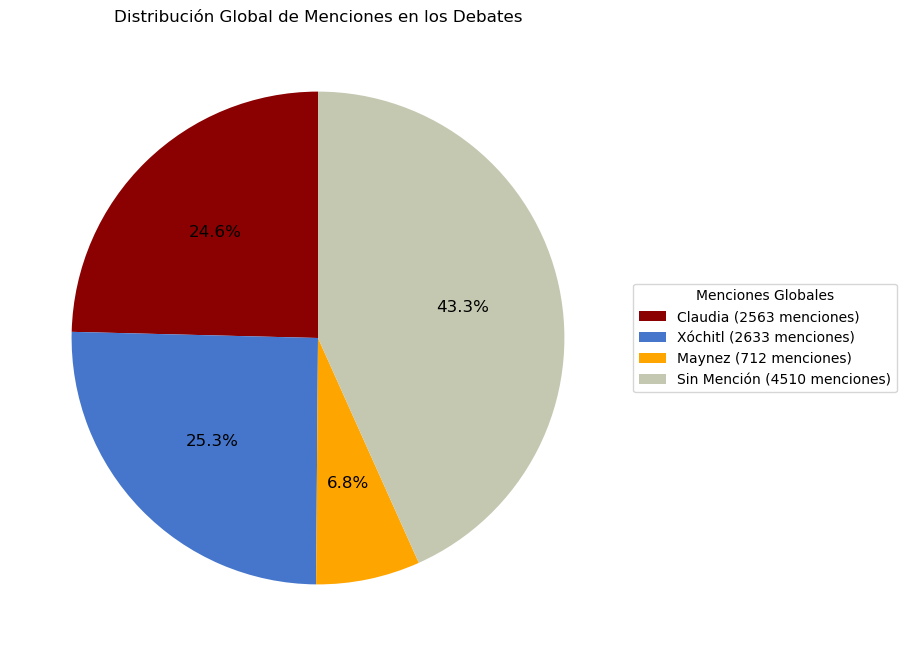

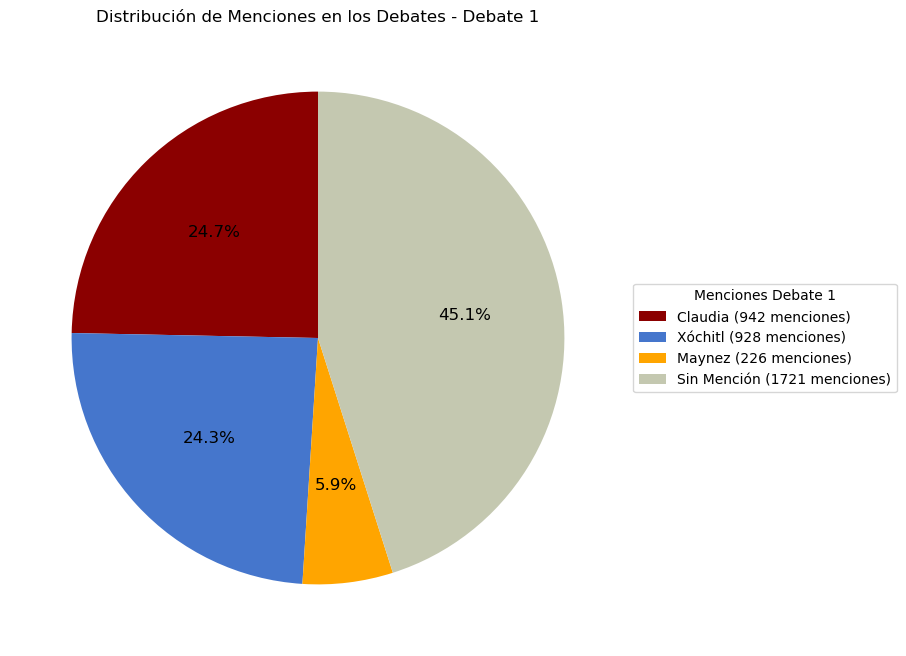

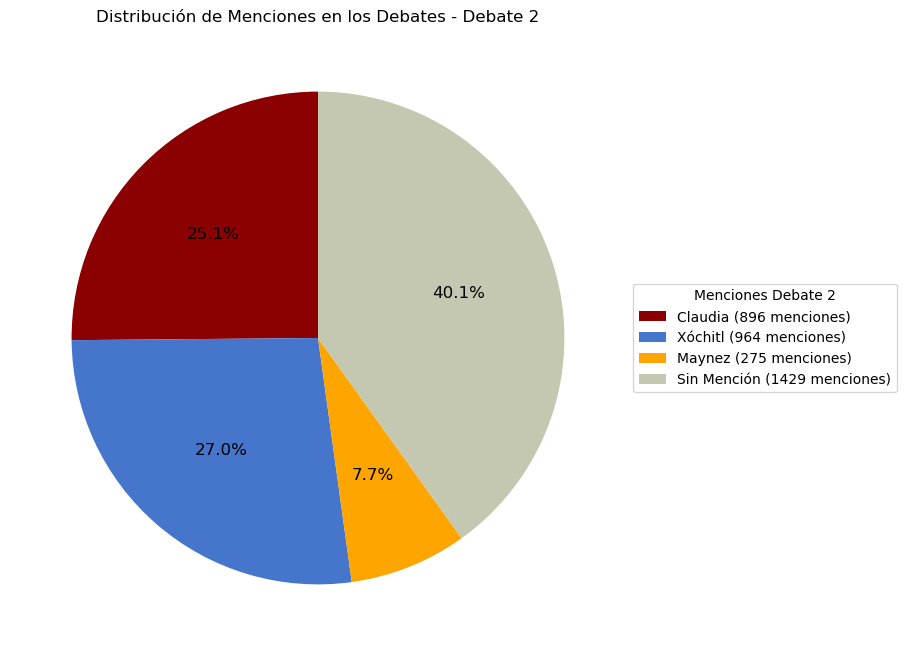

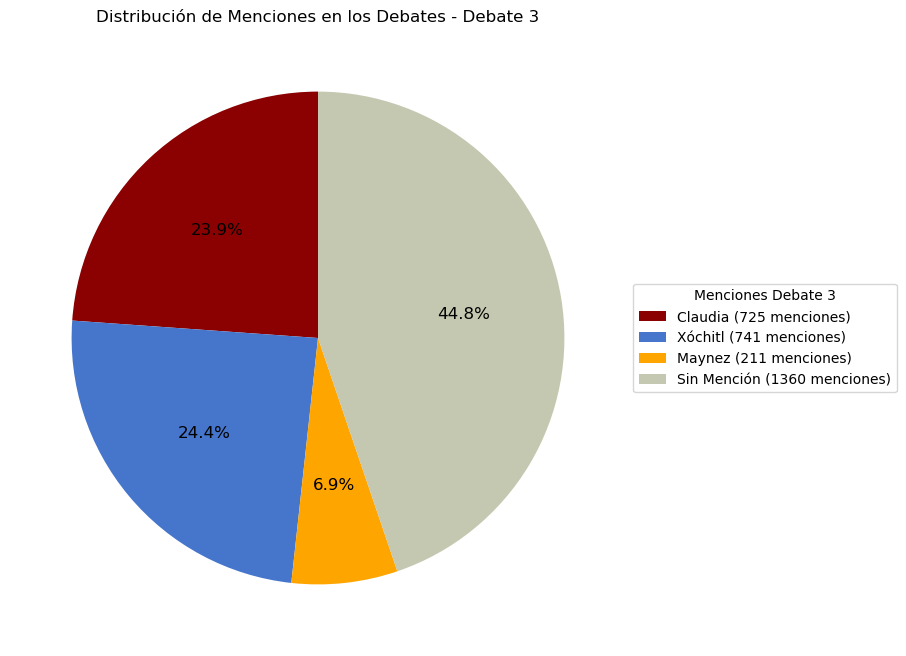

In [ ]:
import matplotlib.pyplot as plt

# Crear una columna para "sin menciones"
youtube_df['sin_mencion'] = ~youtube_df[['claudia_menciones', 'xóchitl_menciones', 'maynez_menciones']].any(axis=1)

global_counts = {
    'Claudia': youtube_df['claudia_menciones'].sum(),
    'Xóchitl': youtube_df['xóchitl_menciones'].sum(),
    'Maynez': youtube_df['maynez_menciones'].sum(),
    'Sin Mención': youtube_df['sin_mencion'].sum()
}

colores = {
    'Claudia': '#8B0000',
    'Xóchitl': '#4576cc',
    'Maynez': '#FFA500',
    'Sin Mención': '#c4c8b0'
}

# Gráfica de pastel global
total_menciones = sum(global_counts.values())
etiquetas = [
    f"{categoria} ({valor} menciones)"
    for categoria, valor in global_counts.items()
]

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    global_counts.values(),
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colores[categoria] for categoria in global_counts.keys()],
    textprops={'fontsize': 12}
)
plt.legend(
    wedges,
    etiquetas,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title='Menciones Globales'
)
plt.title('Distribución Global de Menciones en los Debates')
plt.show()

# Gráfica por debate
for debate in sorted(youtube_df['num_debate'].unique()):
    debate_data = youtube_df[youtube_df['num_debate'] == debate]
    debate_counts = {
        'Claudia': debate_data['claudia_menciones'].sum(),
        'Xóchitl': debate_data['xóchitl_menciones'].sum(),
        'Maynez': debate_data['maynez_menciones'].sum(),
        'Sin Mención': debate_data['sin_mencion'].sum()
    }
    
    total_debate = sum(debate_counts.values())
    etiquetas_debate = [
        f"{categoria} ({valor} menciones)"
        for categoria, valor in debate_counts.items()
    ]

    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        debate_counts.values(),
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=[colores[categoria] for categoria in debate_counts.keys()],
        textprops={'fontsize': 12}
    )
    plt.legend(
        wedges,
        etiquetas_debate,
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        title=f'Menciones Debate {debate}'
    )
    plt.title(f'Distribución de Menciones en los Debates - Debate {debate}')
    plt.show()


En el análisis global y por cada debate, se observa una tendencia constante en la distribución de menciones hacia los candidatos:

1. Menciones Generales: Una proporción significativa de los comentarios no menciona a ningún candidato específico (entre 40% y 45% en todas las gráficas). Esto sugiere que una gran parte de las interacciones en los debates se centra en aspectos generales del evento, como la dinámica, los moderadores o los temas tratados, en lugar de los candidatos individuales.

2. Competencia entre Claudia y Xóchitl: Claudia Sheinbaum y Xóchitl Gálvez mantienen una distribución de menciones muy equilibrada en todos los debates, con porcentajes alrededor del 24% al 27%. Esto refleja que ambas candidatas generaron un nivel similar de interés y discusión en las redes sociales, consolidándose como las figuras más relevantes del proceso.

3. Menor Presencia de Maynez: Jorge Álvarez Maynez tiene una proporción significativamente menor de menciones, oscilando entre el 6% y 8%. Esto sugiere que su participación generó menos resonancia o interés en comparación con las otras dos candidatas.

4. Constancia entre los Debates: Las gráficas muestran una distribución bastante estable a lo largo de los debates, lo que indica que no hubo cambios drásticos en la atención que los usuarios prestaron a cada candidato entre uno y otro evento.



#### 2.1.1. En el día de la elección

In [ ]:
x_df['hora de publicación'] = pd.to_datetime(x_df['hora de publicación'], format='%H:%M', errors='coerce')
print(x_df['hora de publicación'].head())

0   1900-01-01 08:59:00
1   1900-01-01 08:56:00
2   1900-01-01 08:11:00
3   1900-01-01 08:24:00
4   1900-01-01 08:44:00
Name: hora de publicación, dtype: datetime64[ns]


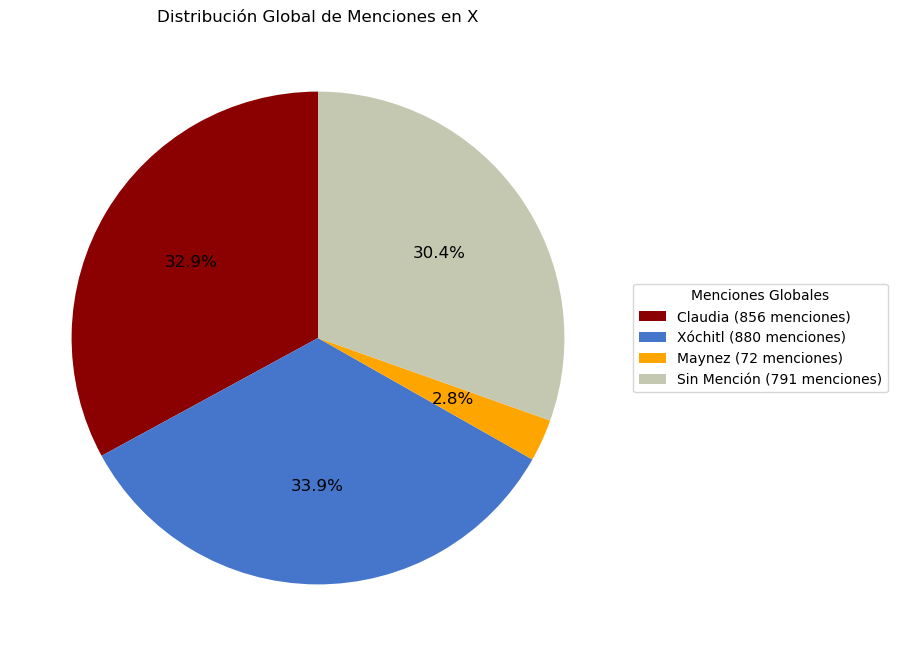

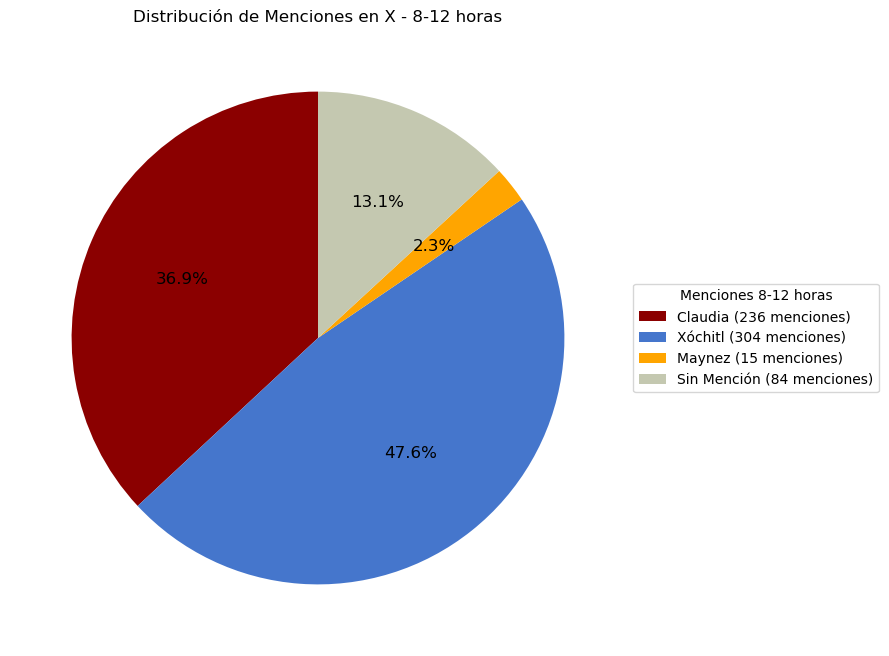

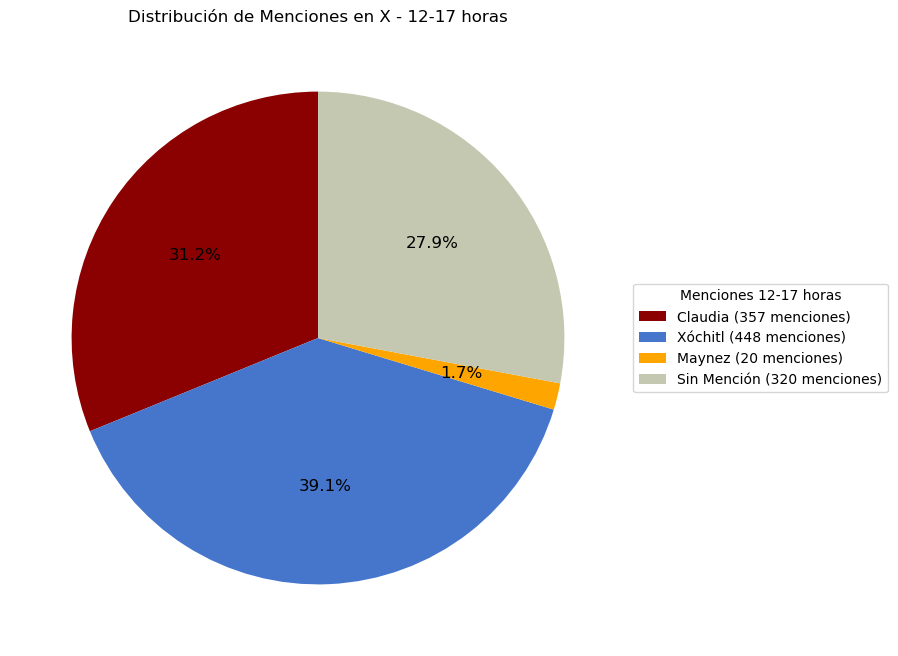

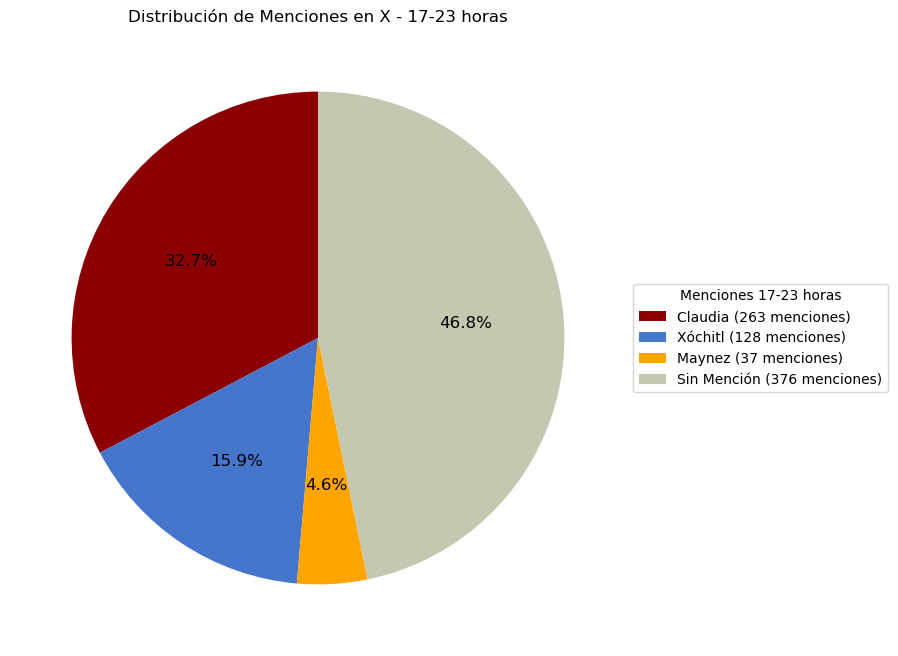

In [ ]:
# Crear una columna para "sin menciones" en X
x_df['sin_mencion'] = ~x_df[['claudia_menciones', 'xóchitl_menciones', 'maynez_menciones']].any(axis=1)

global_counts_x = {
    'Claudia': x_df['claudia_menciones'].sum(),
    'Xóchitl': x_df['xóchitl_menciones'].sum(),
    'Maynez': x_df['maynez_menciones'].sum(),
    'Sin Mención': x_df['sin_mencion'].sum()
}

# Gráfica de pastel global para X
total_menciones_x = sum(global_counts_x.values())
etiquetas_x = [
    f"{categoria} ({valor} menciones)"
    for categoria, valor in global_counts_x.items()
]

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    global_counts_x.values(),
    labels=None,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colores[categoria] for categoria in global_counts_x.keys()],
    textprops={'fontsize': 12}
)
plt.legend(
    wedges,
    etiquetas_x,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    title='Menciones Globales'
)
plt.title('Distribución Global de Menciones en X')
plt.show()

# Definir intervalos de horas
intervalos_horas = {
    '8-12': (8, 12),
    '12-17': (12, 17),
    '17-23': (17, 23)
}

# Gráfica por intervalos de horas
for intervalo, (inicio, fin) in intervalos_horas.items():
    intervalo_data = x_df[
        (x_df['hora de publicación'].dt.hour >= inicio) & (x_df['hora de publicación'].dt.hour < fin)
    ]
    intervalo_counts = {
        'Claudia': intervalo_data['claudia_menciones'].sum(),
        'Xóchitl': intervalo_data['xóchitl_menciones'].sum(),
        'Maynez': intervalo_data['maynez_menciones'].sum(),
        'Sin Mención': intervalo_data['sin_mencion'].sum()
    }
    
    total_intervalo = sum(intervalo_counts.values())
    etiquetas_intervalo = [
        f"{categoria} ({valor} menciones)"
        for categoria, valor in intervalo_counts.items()
    ]

    plt.figure(figsize=(10, 8))
    wedges, texts, autotexts = plt.pie(
        intervalo_counts.values(),
        labels=None,
        autopct='%1.1f%%',
        startangle=90,
        colors=[colores[categoria] for categoria in intervalo_counts.keys()],
        textprops={'fontsize': 12}
    )
    plt.legend(
        wedges,
        etiquetas_intervalo,
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        title=f'Menciones {intervalo} horas'
    )
    plt.title(f'Distribución de Menciones en X - {intervalo} horas')
    plt.show()


1. Distribución Global: La proporción de menciones entre Claudia Sheinbaum (32.9%) y Xóchitl Gálvez (33.9%) es muy similar, lo que refleja que ambas candidatas generaron un interés equiparable a nivel general. Jorge Álvarez Maynez, con solo el 2.8% de las menciones, muestra una presencia muy limitada en las discusiones. Los comentarios sin mención específica representan un 30.4%, lo que sugiere que una parte significativa de las publicaciones aborda temas generales del proceso electoral.

2. Intervalo 8-12 horas: En las primeras horas del día, Xóchitl Gálvez domina con un 47.6% de las menciones, mientras que Claudia Sheinbaum obtiene el 36.9%. Jorge Álvarez Maynez tiene un 2.3%, manteniendo su bajo nivel de atención. Solo el 13.1% de las publicaciones no menciona candidatos, lo que indica que en este intervalo las discusiones estuvieron más focalizadas en los participantes.

3. Intervalo 12-17 horas: Xóchitl Gálvez sigue liderando con un 39.1%, aunque su ventaja frente a Claudia Sheinbaum (31.2%) se reduce Jorge Álvarez Maynez continúa con un bajo porcentaje (1.7%), lo que evidencia su falta de resonancia durante este intervalo. Las publicaciones sin mención específica aumentan al 27.9%, lo que podría reflejar una mayor variedad de temas abordados por los usuarios.

4. Intervalo 17-23 horas: Claudia Sheinbaum supera a Xóchitl Gálvez con un 32.7% frente a 15.9% de las menciones. Este cambio sugiere que hacia el cierre de la jornada electoral, Claudia captó más atención. Jorge Álvarez Maynez incrementa levemente su porcentaje a 4.6%, aunque sigue siendo marginal. Las publicaciones sin mención específica alcanzan un 46.8%, indicando un aumento significativo en los comentarios generales o no relacionados con los candidatos.

### 2.2 Distribución Temporal

La distribución temporal es fundamental para identificar patrones y tendencias en la participación de los usuarios en diferentes momentos clave del proceso electoral. Este análisis permite observar cómo varía la cantidad de interacciones a lo largo del tiempo y cómo se concentran en fechas u horarios específicos. En este apartado se analiza la participación en los debates presidenciales y el comportamiento de los usuarios el día de la elección.

In [150]:
youtube_df['fecha'] = pd.to_datetime(youtube_df['fecha'], format='%d/%m/%Y', errors='coerce')
fechas_unicas = youtube_df['fecha'].unique()
fechas_unicas

<DatetimeArray>
['2024-04-07 00:00:00', '2024-05-19 00:00:00', '2024-04-28 00:00:00']
Length: 3, dtype: datetime64[ns]

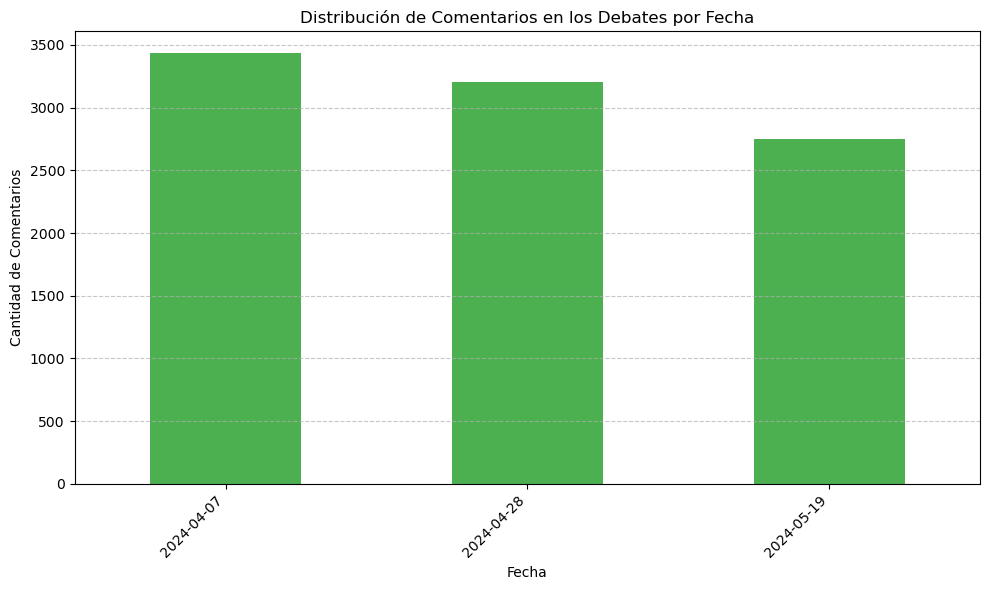

In [ ]:
# Para los Debates: Distribución de comentarios por fecha
if 'fecha' in youtube_df.columns:
    youtube_df['fecha'] = pd.to_datetime(youtube_df['fecha'], errors='coerce')
    comentarios_por_fecha = youtube_df.groupby(youtube_df['fecha'].dt.date).size()
    plt.figure(figsize=(10, 6))
    comentarios_por_fecha.plot(kind='bar', color='#4CAF50')
    plt.title('Distribución de Comentarios en los Debates por Fecha')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de Comentarios')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



La gráfica de distribución de comentarios en los debates muestra una participación constante a lo largo de los tres eventos. El debate del 7 de abril de 2024 tuvo el mayor número de comentarios, con un ligero descenso en los debates posteriores, especialmente en el del 19 de mayo de 2024. Esto podría indicar un alto interés inicial en las propuestas de los candidatos, que disminuyó ligeramente hacia el final del ciclo de debates, posiblemente debido a la repetición de ideas o al desgaste del público.

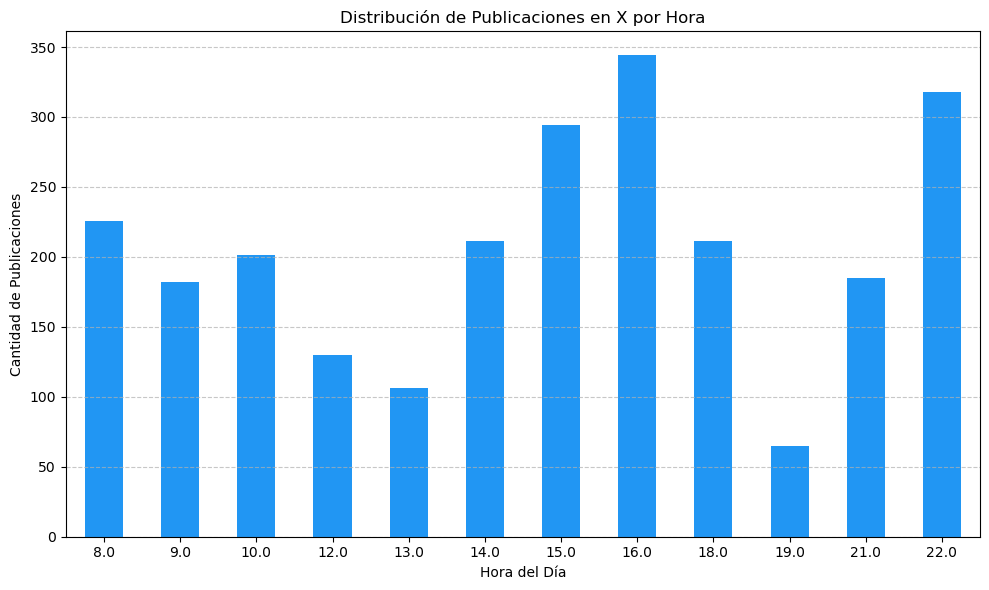

In [ ]:
# Para el día de la elección: Distribución de publicaciones por hora
if 'hora de publicación' in x_df.columns:
    x_df['hora de publicación'] = pd.to_datetime(x_df['hora de publicación'], format='%H:%M', errors='coerce')
    publicaciones_por_hora = x_df.groupby(x_df['hora de publicación'].dt.hour).size()
    plt.figure(figsize=(10, 6))
    publicaciones_por_hora.plot(kind='bar', color='#2196F3')
    plt.title('Distribución de Publicaciones en X por Hora')
    plt.xlabel('Hora del Día')
    plt.ylabel('Cantidad de Publicaciones')
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

La distribución de publicaciones por hora durante el día de la elección muestra picos claros de actividad a las 16:00 horas y nuevamente a las 22:00 horas, lo que podría reflejar el cierre de las casillas y las discusiones sobre los resultados preliminares. En contraste, las horas de la mañana (8:00-12:00) muestran una actividad moderada, probablemente relacionada con el inicio de la jornada electoral. El periodo de menor interacción ocurre alrededor de las 19:00 horas, lo que podría coincidir con un momento de pausa antes del cierre de las votaciones. Esto resalta cómo la actividad en redes sociales está vinculada a hitos clave del día electoral.

In [160]:
youtube_df.sample(5)

num_debate      canal                        username      fecha  \
4389           1      unotv  sergioarturoholguingallego2420 2024-04-07   
1323           1       once                   luissolano302 2024-04-07   
2044           1       nmas                  jackomiste1523 2024-04-07   
3612           2  excelsior                jaimesantana4746 2024-04-28   
861            1        cnn                  adelalopez8602 2024-04-07   

                                                                                                                                                                                                                                                             comentario  \
4389  La candidata Xóchitl,percibo que no tiene la capacidad, para ser la presidenta de este gran y hermoso país,duda mucho en sus respuestas Y no veo ninguna propuesta valida,sus propuestas no veo que tengan ningún fundamento, sin bases solidas es mi percepción.   
1323                                                                                                                           Que triste, este circo lo único para lo que sirvio fue para dejarnos aun mas claro que votes por quien votes, esta mierda no va a acabar   
2044                                                                                                                                                                     Apoyo a Claudia solo te quieren echar tierra también no sabe que hay detrás de todo el trabajo   
3612                                                                                                                                                                                                                                  Claudia para presidente de México   
861                                                                                                                                                Aver sí para el último debate hay hay buen sonido y todo bien parcial en todo por qué sé paga bien por tantas fallas   

      num_likes  \
4389          1   
1323          0   
2044          3   
3612         12   
861           0   

                                                                                                                                                                             tokens  \
4389  [candidata, xochitlpercibo, capacidad, presidenta, gran, hermoso, paisdudo, respuesta, ninguno, propuesta, validasu, propuesta, ningun, fundamento, base, solida, percepcion]   
1323                                                                                                                 [triste, circo, unico, sirvio, dejarno, claro, mierda, acabar]   
2044                                                                                                 [apoyo, claudiar, solo, querer, echar, tierra, tambien, saber, detra, trabajo]   
3612                                                                                                                                                 [claudiar, presidente, mexico]   
861                                                                                                  [aver, ultimo, debate, buen, sonido, bien, parcial, pagar, bien, tanto, falla]   

      claudia_menciones  xóchitl_menciones  maynez_menciones  sin_mencion  \
4389              False               True             False        False   
1323              False              False             False         True   
2044               True              False             False        False   
3612               True              False             False        False   
861               False              False             False         True   

      longitud_comentario  
4389                   17  
1323                    8  
2044                   10  
3612                    3  
861                    11

## 3. Análisis de frecuencias de palabras

En esta sección se realiza un análisis exploratorio para identificar las palabras más frecuentes en los comentarios y publicaciones relacionadas con los debates presidenciales y el día de la elección. Este análisis se lleva a cabo mediante la generación de nubes de palabras, que permiten visualizar de forma intuitiva los términos más recurrentes en los datos.

### 3.1. Para los debates

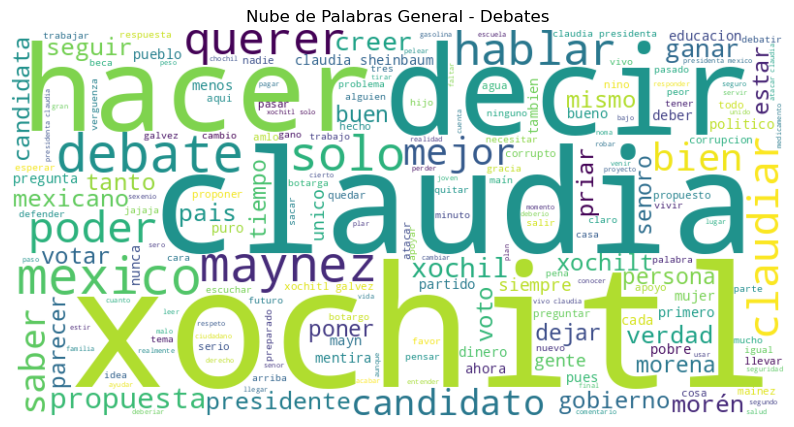

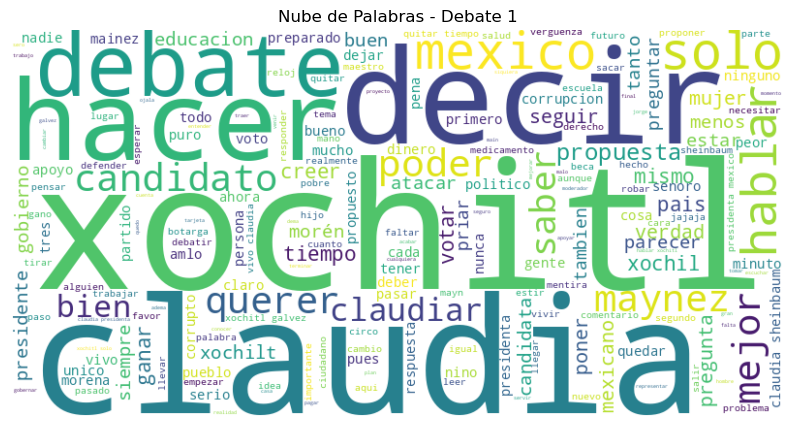

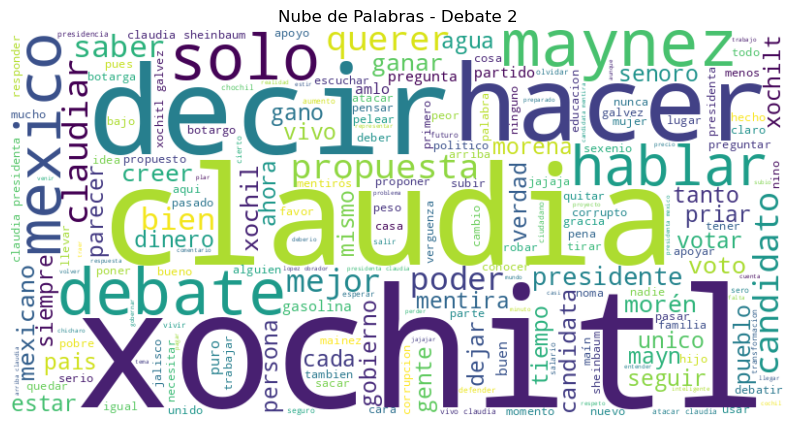

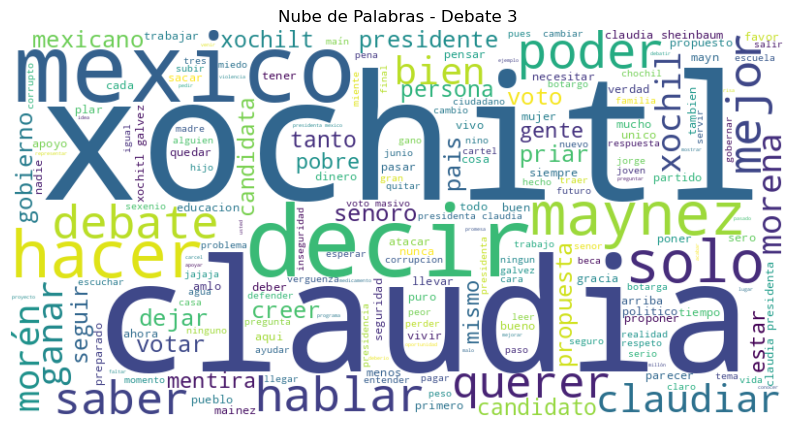

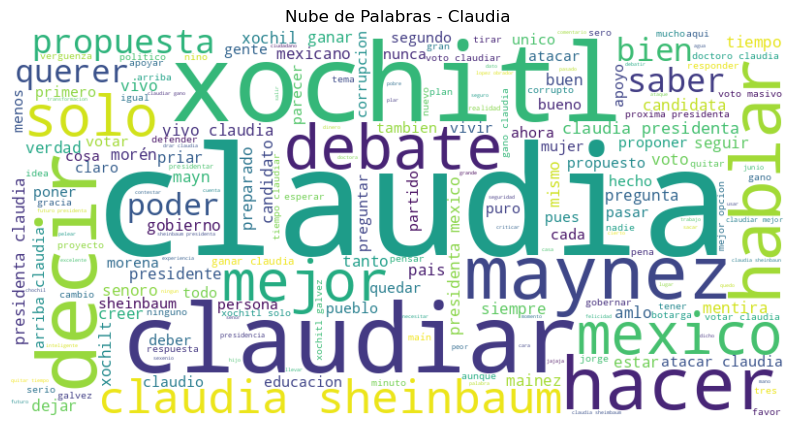

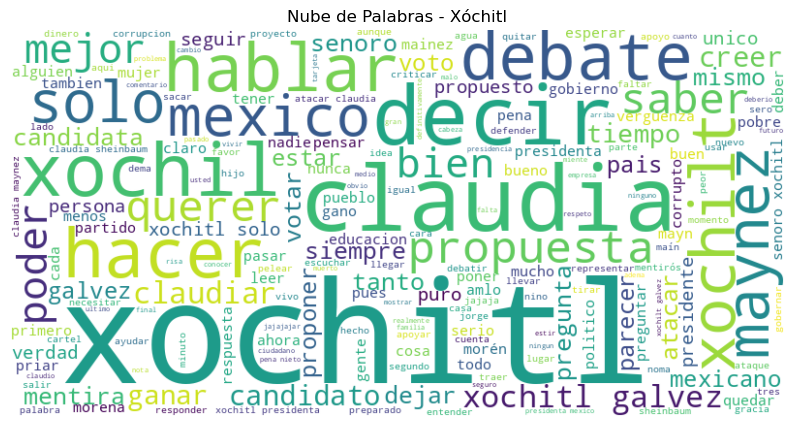

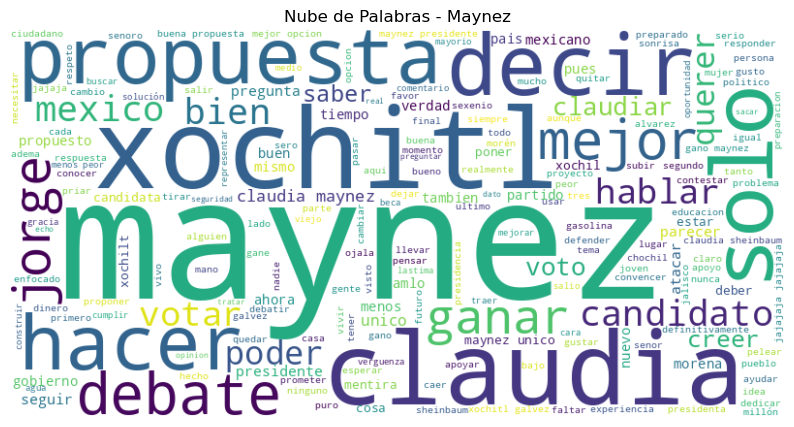

In [ ]:
from wordcloud import WordCloud

youtube_df['tokens'] = youtube_df['tokens'].apply(lambda tokens: [token for token in tokens if len(token) > 3])

# Nube de palabras general para todos los debates
texto_general = ' '.join([' '.join(tokens) for tokens in youtube_df['tokens']])
wordcloud_general = WordCloud(width=800, height=400, background_color='white').generate(texto_general)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_general, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras General - Debates')
plt.show()

# Nubes de palabras por debate
for debate in sorted(youtube_df['num_debate'].unique()):
    texto_debate = ' '.join([' '.join(tokens) for tokens in youtube_df[youtube_df['num_debate'] == debate]['tokens']])
    wordcloud_debate = WordCloud(width=800, height=400, background_color='white').generate(texto_debate)
    
    # Mostrar la nube de palabras por debate
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_debate, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras - Debate {debate}')
    plt.show()

# Nubes de palabras por candidato usando las columnas de menciones
for candidato in ['claudia', 'xóchitl', 'maynez']:
    texto_candidato = ' '.join([
        ' '.join(tokens) for tokens in youtube_df[youtube_df[f'{candidato}_menciones']]['tokens']
    ])
    wordcloud_candidato = WordCloud(width=800, height=400, background_color='white').generate(texto_candidato)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_candidato, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras - {candidato.capitalize()}')
    plt.show()



**Análisis de las nubes de palabras**

En la nube de palabras general de los debates, se observa una predominancia de términos como "decir", "hacer", "debate", "candidato" y menciones directas a los nombres de los candidatos, como "claudia", "xóchitl" y "maynez". Esto refleja que las discusiones se centran en las propuestas, el desempeño en los debates y las expectativas de los usuarios en torno a los participantes. Palabras relacionadas con el contexto político y social como "México", "gobierno" y "propuesta" también son frecuentes, indicando un interés en los temas tratados.

Por otro lado, en las nubes de palabras individuales de los debates, se observan ligeras variaciones en los términos predominantes. Por ejemplo, en el primer debate destacan términos como "preguntar" y "atacar", lo que podría sugerir un enfoque más confrontativo. En el segundo debate, términos como "ganar" y "propuesta" son más prominentes, reflejando quizás un tono más propositivo. Finalmente, en el tercer debate, hay una recurrencia de términos como "hablar" y "decir", sugiriendo un interés en la claridad y el contenido de los mensajes. En conjunto, estas nubes reflejan cómo el enfoque y la percepción de los usuarios varían con el desarrollo de los debates.

Finalmente, al observar las nubes de palabras por candidato, se notan temas asociados directamente con cada uno. Para Claudia, destacan términos como "sheinbaum", "gobierno" y "morena", reflejando su vínculo con el partido y su posición actual. Para Xóchitl, palabras como "propuesta", "ganar" y "hablar" resaltan su rol como contendiente y sus promesas de campaña. Finalmente, en el caso de Maynez, términos como "educación", "presidente" y "cambio" indican un enfoque hacia propuestas específicas y una narrativa de renovación. Estas nubes permiten identificar cómo perciben los usuarios a cada candidato y los temas que asocian con ellos.

### 3.2 Para el día de la elección

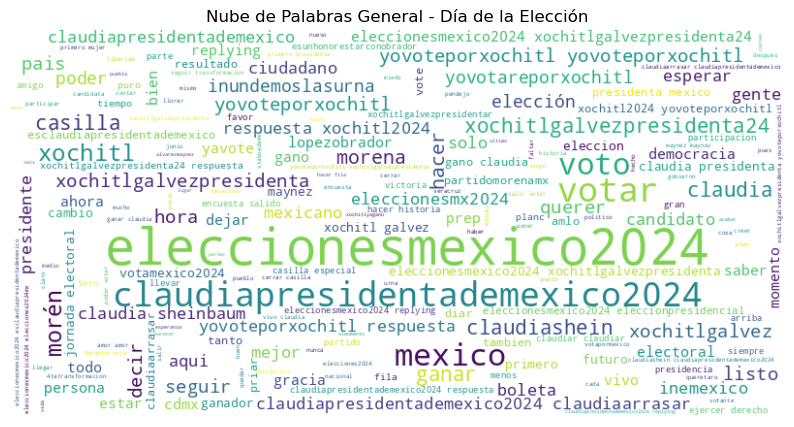

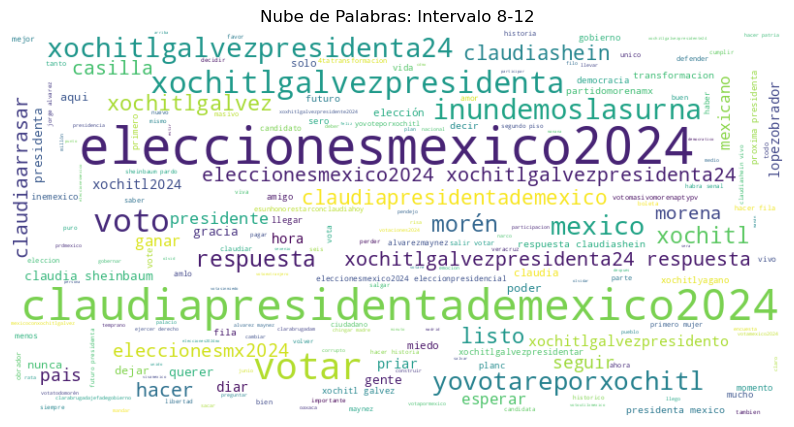

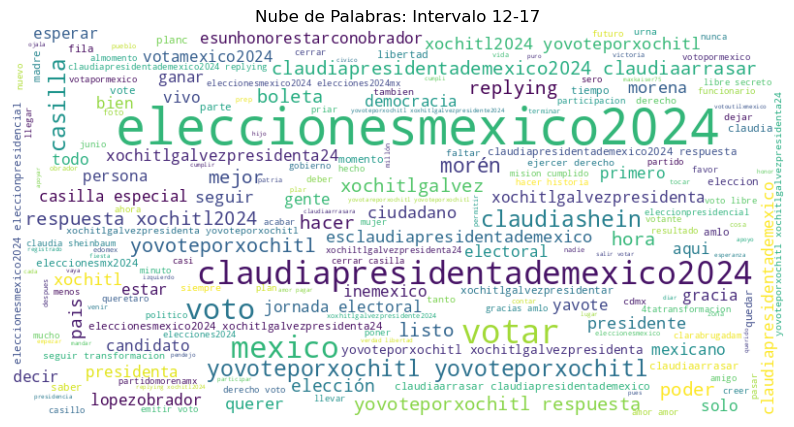

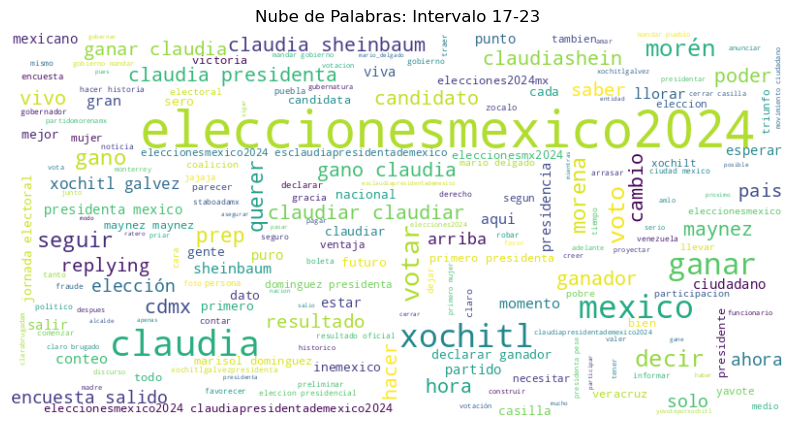

In [ ]:
x_df['tokens'] = x_df['tokens'].apply(lambda tokens: [token for token in tokens if len(token) > 3])

# Nube de palabras general para todo el día de la elección
texto_general_x = ' '.join([' '.join(tokens) for tokens in x_df['tokens']])
wordcloud_general_x = WordCloud(width=800, height=400, background_color='white').generate(texto_general_x)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_general_x, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras General - Día de la Elección')
plt.show()

intervalos_horas_x = {
    '8-12': (8, 12),
    '12-17': (12, 17),
    '17-23': (17, 23)
}

# Nubes de palabras por intervalo
for intervalo, (inicio, fin) in intervalos_horas_x.items():
    intervalo_data_x = x_df[
        (x_df['hora de publicación'].dt.hour >= inicio) & (x_df['hora de publicación'].dt.hour < fin)
    ]
    texto_intervalo_x = ' '.join([' '.join(tokens) for tokens in intervalo_data_x['tokens']])
    wordcloud_intervalo_x = WordCloud(width=800, height=400, background_color='white').generate(texto_intervalo_x)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud_intervalo_x, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Nube de Palabras: Intervalo {intervalo}')
    plt.show()


En la nube general del día de la elección destaca términos como "eleccionesmexico2024", "votar", "claudiapresidentademexico2024" y "xochitlgálvezpresidenta24". Esto refleja el enfoque de los usuarios en la jornada electoral, con énfasis en los principales candidatos y la participación ciudadana, indicando el interés por el proceso democrático.

Y por intervalos, describimos a continuación las observaciones por cada uno:

- Intervalo 8-12: Las menciones predominantes incluyen términos como "votar", "inundemoslasurnas" y etiquetas relacionadas con ambos candidatos principales. Este periodo se caracteriza por mensajes incentivando el voto temprano y la participación.

- Intervalo 12-17: Se mantiene el protagonismo de "eleccionesmexico2024" y "claudiapresidentademexico2024", junto con menciones a "casilla" y "jornada electoral". Refleja el progreso del día y el aumento de interacciones relacionadas con el acto de votar.

- Intervalo 17-23: En las últimas horas, destacan términos como "ganar", "resultados" y "candidata". Esto indica una transición hacia la expectativa de resultados y comentarios finales sobre el cierre de casillas.

En general, las nubes reflejan cómo la narrativa cambia a lo largo del día, desde promover la participación hasta debatir resultados y candidatos clave.

## 4. Análisis de Engagement (YouTube)

En esta sección se analiza el nivel de interacción que generan los comentarios en los debates presidenciales, utilizando como indicador principal el número de "me gusta" (num_likes). Este análisis busca identificar patrones asociados a los comentarios más populares, como su relación con la longitud del texto, el contenido o el debate en el que fueron realizados. Asimismo, se revisan los comentarios con más "likes" para comprender las opiniones y temas que generaron mayor resonancia entre los usuarios.

In [163]:
pd.set_option('display.max_colwidth', None)
comentarios_populares = youtube_df.nlargest(5, 'num_likes')[['comentario', 'num_likes', 'num_debate']]
print(comentarios_populares)


                                                                                                      comentario  \
3831  Es en serio lo que dijo la candidata Xochitl. ¿Pregúntenle a los muertos?. Que tonterías dice y sin razón.   
3848         Imagínense que Xochitl quedara de presidente. No mms la peor vergüenza mundial que Nos podría pasar   
3832                                                                   Xochil galvez es un peña nieto cualquiera   
3839              Xóchitl se pone nerviosa en un debate y se traba al expresarse. Imagínate para dirigir un país   
2529                               Bla bla bla.   A estas alturas.  Ya sabemos quién miente.  No somos pendejos.   

      num_likes  num_debate  
3831        823           1  
3848        745           1  
3832        717           1  
3839        661           1  
2529        545           3  


Observaciones sobre los comentarios más populares

Los comentarios con mayor número de "me gusta" tienden a centrarse en juicios hacia los candidatos, utilizando un tono crítico y humorístico. En particular, los cinco comentarios más populares observados tienen en común:

- Foco en Xóchitl Gálvez: Todos los comentarios hacen referencia directa a Xóchitl, lo que sugiere que su participación en los debates generó un alto nivel de interacción.
- Tono crítico o sarcástico: Los usuarios tienden a usar ironías o críticas contundentes, que parecen captar más atención y "me gusta".
- Debate predominante: Cuatro de los cinco comentarios están relacionados con el primer debate, lo que indica que este evento pudo haber generado el mayor nivel de controversia y participación.



## 5. Análisis de Longitud y Complejidad de Comentarios

En esta sección se evalúa la longitud de los comentarios en YouTube y las publicaciones en la plataforma X, medida en cantidad de palabras. Este análisis permite comprender la complejidad y nivel de detalle de las interacciones en ambas plataformas. Se utiliza la longitud promedio como un indicador clave y se visualiza mediante histogramas que muestran la distribución de la frecuencia de palabras. Además, una línea punteada roja señala el promedio, ayudando a identificar si los comentarios suelen ser más extensos o concisos. Este enfoque facilita detectar patrones relacionados con la profundidad de las opiniones de los usuarios.

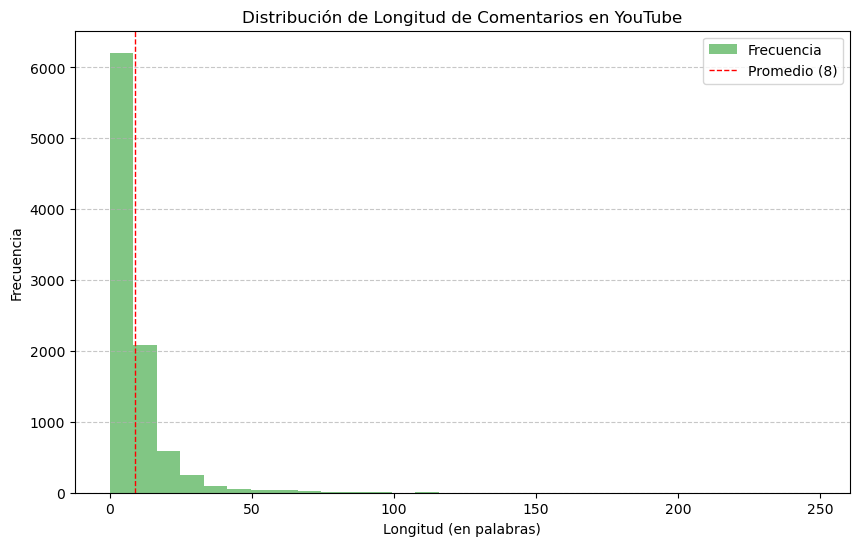

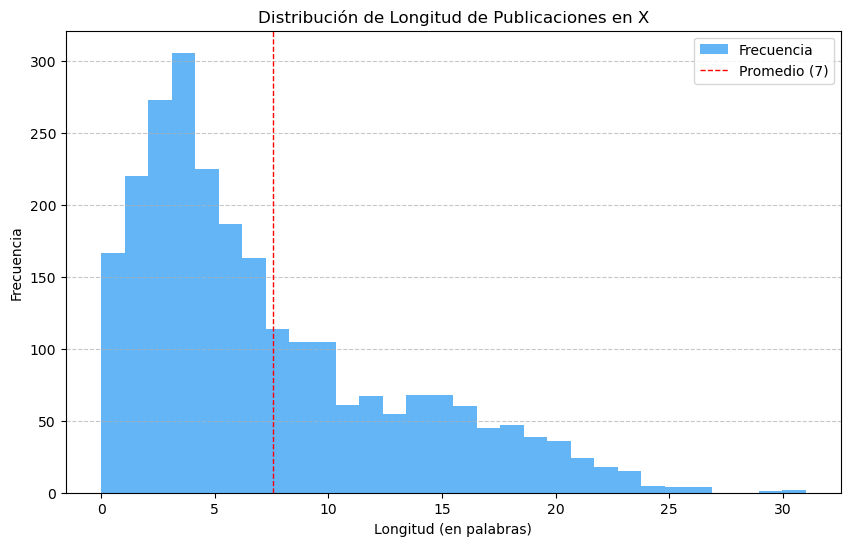

In [ ]:
# Debates: Distribución de longitud de comentarios
youtube_df['longitud_comentario'] = youtube_df['tokens'].apply(len)
longitud_promedio_youtube = youtube_df['longitud_comentario'].mean()
plt.figure(figsize=(10, 6))
plt.hist(youtube_df['longitud_comentario'], bins=30, color='#4CAF50', alpha=0.7, label='Frecuencia')
plt.axvline(longitud_promedio_youtube, color='red', linestyle='dashed', linewidth=1, label=f'Promedio ({int(longitud_promedio_youtube)})')
plt.title('Distribución de Longitud de Comentarios en YouTube')
plt.xlabel('Longitud (en palabras)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Día de la elección: Distribución de longitud de publicaciones
x_df['longitud_publicacion'] = x_df['tokens'].apply(len)
longitud_promedio_x = x_df['longitud_publicacion'].mean()
plt.figure(figsize=(10, 6))
plt.hist(x_df['longitud_publicacion'], bins=30, color='#2196F3', alpha=0.7, label='Frecuencia')
plt.axvline(longitud_promedio_x, color='red', linestyle='dashed', linewidth=1, label=f'Promedio ({int(longitud_promedio_x)})')
plt.title('Distribución de Longitud de Publicaciones en X')
plt.xlabel('Longitud (en palabras)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


En los histogramas presentados se observa la distribución de la longitud de los comentarios y publicaciones en los datasets de YouTube y X, respectivamente.

1. YouTube: La mayoría de los comentarios tienen una longitud muy corta, con un promedio de 8 palabras. Esto indica que los usuarios en esta plataforma tienden a realizar aportaciones concisas, posiblemente debido a la naturaleza del contenido de YouTube, que fomenta interacciones rápidas y directas. Sin embargo, hay una pequeña cantidad de comentarios que alcanzan longitudes mayores, reflejando una profundidad ocasional en el discurso.

2. X: Las publicaciones en X también muestran un comportamiento de longitud predominantemente corto, con un promedio ligeramente menor, de 7 palabras. Esto puede atribuirse al formato de la plataforma, históricamente restringido en caracteres, lo que impulsa a los usuarios a ser breves. Sin embargo, se observa una mayor variabilidad en las longitudes en comparación con YouTube, con publicaciones que alcanzan hasta más de 30 palabras, posiblemente reflejando usuarios aprovechando la extensión actualizada de caracteres.

## 6. Conclusiones Preliminares

**De la Participación por Fecha y Plataforma:** En YouTube, la mayor cantidad de comentarios se concentra en el primer debate, disminuyendo ligeramente en los debates posteriores. Esto sugiere que el interés disminuyó conforme avanzaron los debates. En X, las publicaciones se distribuyen de manera más uniforme a lo largo del día de la elección, con un pico notable en los intervalos de la tarde, entre las 12:00 y 17:00, indicando una mayor actividad cuando se reportan resultados preliminares o momentos clave.

**De las Menciones a Candidatos:** En ambos datasets, Claudia Sheinbaum y Xóchitl Gálvez presentan una proporción similar de menciones, reflejando su protagonismo en la conversación electoral. Jorge Álvarez Maynez tiene una participación significativamente menor.Un alto porcentaje de comentarios no menciona explícitamente a ningún candidato, lo que puede implicar discusiones generales sobre los debates o temas relacionados con la elección sin una referencia directa a los candidatos.

**De la Frecuencia de Palabras:** En las nubes de palabras de los debates, los términos más frecuentes están relacionados con "decir", "hacer", "propuestas" y los nombres de los candidatos, reflejando un enfoque en las declaraciones y promesas durante los debates. En el día de la elección, destacan palabras como "eleccionesmexico2024", "votar", "casilla" y "resultados", lo que subraya la interacción centrada en el acto de votar y la espera de resultados.

**Del Engagement (YouTube):** Los comentarios con mayor número de likes tienden a ser más críticos o emocionales, especialmente hacia ciertos candidatos, lo que sugiere que las opiniones polarizadas generan mayor interacción.

**De la Longitud y Complejidad:** Los comentarios en YouTube tienen un promedio de 8 palabras, mientras que las publicaciones en X tienen un promedio de 7 palabras, reflejando la naturaleza breve y directa de las interacciones en ambas plataformas. En ambas plataformas, la distribución de longitud es altamente sesgada hacia comentarios muy cortos, con pocas interacciones más elaboradas.

_Resumen General_

Los resultados reflejan patrones importantes de participación y discurso en redes sociales durante el contexto electoral. Los candidatos principales, Claudia Sheinbaum y Xóchitl Gálvez, dominan la conversación, mientras que Jorge Álvarez Maynez tiene un impacto menor. Las palabras clave destacan el enfoque de los usuarios en propuestas y resultados, mientras que las interacciones tienden a ser breves y rápidas, acorde al formato de las plataformas.